## **Data Cleaning Process Using Tidy Data Principles**

### Step 1: Load the Original Untidy DataFrame
The original dataset is loaded to inspect its structure before applying tidy data principles.  
In its current form, the data is **untidy**, making it harder to manipulate and analyze effectively.

---

### Step 2: Melt the DataFrame (Tidy Data Principle - Each Observation in Its Own Row)
The `melt()` method is used to reshape the dataset by:

- Converting multiple year columns into a single `Year` column.
- Storing corresponding R&D budgets in a new `RD_Budget` column.  

- This step aligns with tidy data principles by ensuring that each observation (budget entry) has its own row
---

### Step 3: Split Year and GDP Values (Tidy Data Principle - Each Variable in Its Own Column)
Using `.str.split()` to:

- Separate the `Year` values from `GDP` values.  
- This step ensures each variable is stored in its own column, improving clarity and accessibility.

---

### Step 4: Clean the 'GDP' Column (Ensuring Numeric Data for Analysis)
- The `.str.replace()` method is used to remove the `"gdp"` text from the `GDP` column.  
- The `.astype(float)` method converts GDP values from strings to numeric format for accurate calculations.


---

### Why Tidy Data is Important
By reshaping the data into a **tidy format**, the dataset becomes:

- Easier to manipulate using functions like `.groupby()` and `.pivot_table()`.  
- More efficient for performing calculations and generating insights.  
- Ideal for creating visualizations that clearly communicate trends and patterns.

---


In [89]:
# Applying the data cleaning concepts 
# Output the original untidy data frame

import pandas as pd

print("Original (untidy) Federal R&D budget data frame ")
df = pd.read_csv("Data/fed_rd_year&gdp.csv")
print(df.head())


# Melt the DataFrame: convert subject columns of years into a single 'year' column,
# with their corresponding budgets in a new 'Budget' column

df_melted = df.melt( id_vars = 'department', value_vars= df.columns, var_name = 'Year', value_name= 'RD_Budget')
#df_melted

# Using string splitting to separate the year from the budget
df_melted[['Year', 'GDP']] = df_melted['Year'].str.split(pat = '_', expand = True)


# Now cleaning up the 'GDP' column 
# Split the column into different variables: 'GDP' and 'RD_Budget'
df_melted['GDP'] = df_melted['GDP'].str.replace('gdp', '')

# Convert the 'GDP' column to numeric because it splitting the column has the number as an object
df_melted['GDP'] = df_melted['GDP'].astype(float)


Original (untidy) Federal R&D budget data frame 
  department  1976_gdp1790000000000.0  1977_gdp2028000000000.0  \
0        DHS                      NaN                      NaN   
1        DOC             8.190000e+08             8.370000e+08   
2        DOD             3.569600e+10             3.796700e+10   
3        DOE             1.088200e+10             1.374100e+10   
4        DOT             1.142000e+09             1.095000e+09   

   1978_gdp2278000000000.0  1979_gdp2570000000000.0  1980_gdp2797000000000.0  \
0                      NaN                      NaN                      NaN   
1             8.710000e+08             9.520000e+08             9.450000e+08   
2             3.702200e+10             3.717400e+10             3.700500e+10   
3             1.566300e+10             1.561200e+10             1.522600e+10   
4             1.156000e+09             1.004000e+09             1.048000e+09   

   1981_gdp3138000000000.0  1982_gdp3314000000000.0  1983_gdp354100000000

## **Tidy Data Frame**

In [90]:
print("Tidy Federal R&D Budget Data Frame ")
df_melted.head(10)

Tidy Federal R&D Budget Data Frame 


,department,Year,RD_Budget,GDP
0,DHS,1976,NaN,1.790000e+12
1,DOC,1976,8.190000e+08,1.790000e+12
2,DOD,1976,3.569600e+10,1.790000e+12
3,DOE,1976,1.088200e+10,1.790000e+12
4,DOT,1976,1.142000e+09,1.790000e+12
5,EPA,1976,9.680000e+08,1.790000e+12
6,HHS,1976,9.226000e+09,1.790000e+12
7,Interior,1976,1.152000e+09,1.790000e+12
8,NASA,1976,1.251300e+10,1.790000e+12
9,NIH,1976,8.025000e+09,1.790000e+12


## **Creating Visualizations**

## Visualizing R&D Budget and GDP Trends

### Step 1: Creating Subplots
A **subplot layout** with **1 row and 2 columns** is used to display two graphs side by side for better comparison.

---

### Step 2: Grouping Data for Visualization
- The `.groupby()` method is applied to:
  - **Sum** the `RD_Budget` values by year for the first plot.  
  - **Average** the `GDP` values by year for the second plot.  

Grouping ensures data is aggregated correctly for meaningful trend analysis.

---

### Step 3: Customization
- The `ax=axes[0]` and `ax=axes[1]` assignments place each plot in its respective subplot.
- Axis labels and titles are then added.

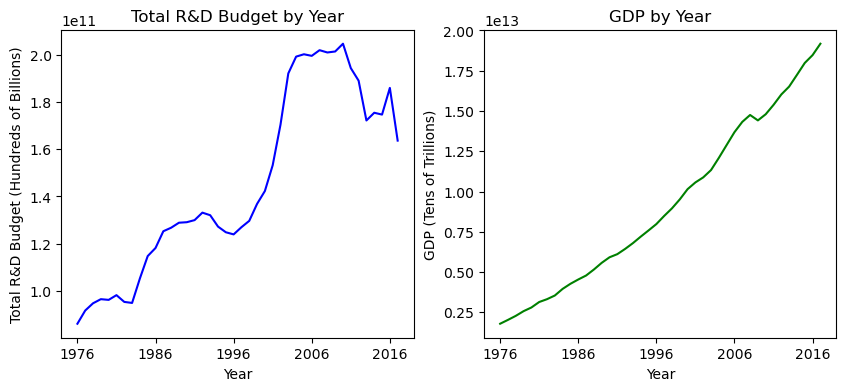

In [91]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Create a figure with 1 row and 2 columns to get side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# Chart 1: Total R&D Budget by Year
# Creating a sub data frame from the tidy data set that contains the summed R&D budget across all departments by year
# To group this data together, we use the groupby() method on the 'Year' column, and then sum() the 'RD_Budget' column

df_melted.groupby('Year')[['RD_Budget']].sum().plot(
    kind='line',
    ax=axes[0],              # Assign to first subplot
    color='blue',
    title='Total R&D Budget by Year',
    legend=False
)
axes[0].set_xlabel("Year")
axes[0].set_ylabel('Total R&D Budget (Hundreds of Billions)')

# Chart 2: GDP by Year
df_melted.groupby('Year')[['GDP']].mean().plot(
    kind='line',
    ax=axes[1],              # Assign to second subplot
    color='green',
    title='GDP by Year',
    legend=False
)
axes[1].set_xlabel("Year")
axes[1].set_ylabel('GDP (Tens of Trillions)')

plt.show()

## Top 5 Departments by Average R&D Budget (Across all Time)

- Used `.groupby()` to group data by **department** and calculate the **average R&D budget**.  
- Sorted values using `.sort_values()` and selected the **top 5** with `.head(5)`.  
- Visualized the data with `.plot(kind='pie')`, showing percentage values using `autopct='%.1f%%'`.  


array([<Axes: >], dtype=object)

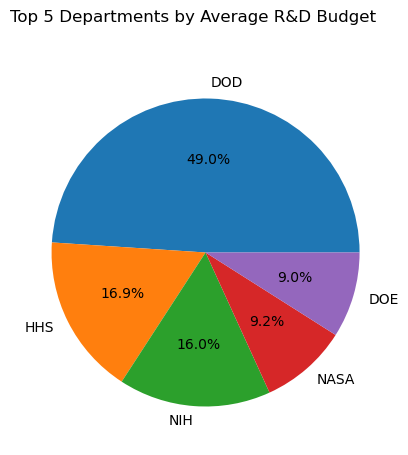

In [92]:
# Group the melted DataFrame by 'department'
# Select the 'RD_Budget' column
# Calculate the average R&D budget for each department
df_melted.groupby('department')[['RD_Budget']].mean().sort_values(by = 'RD_Budget', ascending = False).head(5).plot(kind = 'pie',
                                            subplots = True,
                                            figsize = (10, 5),
                                            title = 'Top 5 Departments by Average R&D Budget',
                                            legend= False,
                                            ylabel = '', 
                                            autopct='%.1f%%')


## Pivot Table Trends

### Step 1: Create a New Decade Column
To gain new insights using the `.aggfunc()` method in a pivot table, creating a `Decade` column allows grouping data by broader time periods. This enables easier trend analysis and the calculation of meaningful averages for each department.

---


In [93]:
# Creating a 'Decade' column by rounding the year down to the nearest 10
df_melted['Decade'] = (df_melted['Year'].astype(int) // 10) * 10
df_melted.head()

,department,Year,RD_Budget,GDP,Decade
0,DHS,1976,NaN,1.790000e+12,1970
1,DOC,1976,8.190000e+08,1.790000e+12,1970
2,DOD,1976,3.569600e+10,1.790000e+12,1970
3,DOE,1976,1.088200e+10,1.790000e+12,1970
4,DOT,1976,1.142000e+09,1.790000e+12,1970


### Step 2: Create the Pivot Table
The following code creates a pivot table that calculates the **average R&D budget** for each department across different decades:

- I used `index='Decade'` to group data into broader time periods, making long-term trends easier to analyze.  
- I used `columns='department'` to compare R&D budgets across different departments.  
- I used `aggfunc='mean'` to calculate the average R&D budget for each department within each decade.  


---

In [94]:
# Pivot the DataFrame to get the average R&D budget for each department by decade
pivot_rd_year_dept = df_melted.pivot_table(
    values='RD_Budget', 
    index='Decade', 
    columns='department', 
    aggfunc= 'mean')
print('Average R&D Budget by Department for each Decade')
pivot_rd_year_dept

Average R&D Budget by Department for each Decade


department,DHS,DOC,DOD,DOE,DOT,EPA,HHS,Interior,NASA,NIH,NSF,Other,USDA,VA
Decade,,,,,,,,,,,,,,
1970,NaN,8.697500e+08,3.696475e+10,1.397450e+10,1.099250e+09,1.052750e+09,9.848250e+09,1.133750e+09,1.266525e+10,8.571000e+09,2.404250e+09,1.507250e+09,1.912250e+09,3.717500e+08
1980,NaN,7.823000e+08,5.800460e+10,1.205320e+10,7.945000e+08,6.791000e+08,1.109360e+10,8.509000e+08,9.179100e+09,1.043990e+10,2.645900e+09,1.568800e+09,1.979800e+09,3.796000e+08
1990,NaN,1.326000e+09,5.801480e+10,1.077520e+10,8.859000e+08,8.355000e+08,1.793890e+10,9.393000e+08,1.391670e+10,1.691540e+10,3.439700e+09,1.570400e+09,2.309000e+09,5.440000e+08
2000,1.176000e+09,1.472200e+09,8.071160e+10,1.090670e+10,9.558000e+08,7.492000e+08,3.375300e+10,8.164000e+08,1.329180e+10,3.223900e+10,5.025100e+09,1.318800e+09,2.856500e+09,1.008200e+09
2010,8.137500e+08,1.554875e+09,7.520112e+10,1.323162e+10,9.735000e+08,5.836250e+08,3.365200e+10,9.028750e+08,1.191925e+10,3.208888e+10,6.113250e+09,1.521375e+09,2.611500e+09,1.252250e+09


### Table for Year-over-Year (YoY) Percentage Change in R&D Budget  
- The raw budget values can be difficult to interpret, making it challenging to track changes over time. Presenting the data as percentage changes from the previous decade provides a clearer view of budget increases and decreases, making trends easier to identify.


---

### Step 1: Adding percent change method
- Use Pandas' `.pct_change()` method, which computes the percentage change

In [95]:
# No need to change the axis because

pivot_rd_year_dept_pct = df_melted.pivot_table(
    values='RD_Budget', 
    index='Decade', 
    columns='department', 
    aggfunc= 'mean').pct_change().round(2) *100
pivot_rd_year_dept_pct

department,DHS,DOC,DOD,DOE,DOT,EPA,HHS,Interior,NASA,NIH,NSF,Other,USDA,VA
Decade,,,,,,,,,,,,,,
1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980,NaN,-10.0,57.0,-14.0,-28.0,-35.0,13.0,-25.0,-28.0,22.0,10.0,4.0,4.0,2.0
1990,NaN,70.0,0.0,-11.0,12.0,23.0,62.0,10.0,52.0,62.0,30.0,0.0,17.0,43.0
2000,NaN,11.0,39.0,1.0,8.0,-10.0,88.0,-13.0,-4.0,91.0,46.0,-16.0,24.0,85.0
2010,-31.0,6.0,-7.0,21.0,2.0,-22.0,-0.0,11.0,-10.0,-0.0,22.0,15.0,-9.0,24.0
